## The effect of varying slope angles and aspects within a start zone on natural dry slab avalanches’ frequency.
This notebook demonstrates the process of acquiring start zone slope parameters and comparing slope steepness and aspect variations to natural avalanche occurrences on the Seven Sisters.  To do so, I used 1.2 by 1.2 m DEM of the Seven Sisters area and used a Google Earth kml file for each start zone to clip the star zones.  
I calculated the kurtosis values (https://en.wikipedia.org/wiki/Kurtosis) of all the 1.2 by 1.2 cells in each start zone as a proxy of the variations between different slope angles and aspects within each start zone. 


In [61]:
# Import libraries:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from terrain_util import *
from avl_data import load_avalanches

matplotlib.rcParams['figure.figsize'] = (12, 12)

In [2]:
DATA_PATH = 'C:/Users/Avalanche/Documents/projects/Summer2024/Startzones/data'
SISTERS_DATA_PATH = os.path.join(DATA_PATH, 'Sisters')
AVI_DATA_PATH = os.path.join(DATA_PATH, 'avalanches', 'CAIC_HWY_avalanches_2009-01-01_2021-05-04.csv')

## Here we are going to look at Seven Sisters start zones:
upload as show Google Earth image of the Seven Sisteres start zones. To see these start zone in Google earth, download the kml file (https://github.com/ronimos/GeoStartZones/blob/main/data/Sisters/Sisters_SZs.kml) and open it with Google Earth.

Text(450, 160, '#6')

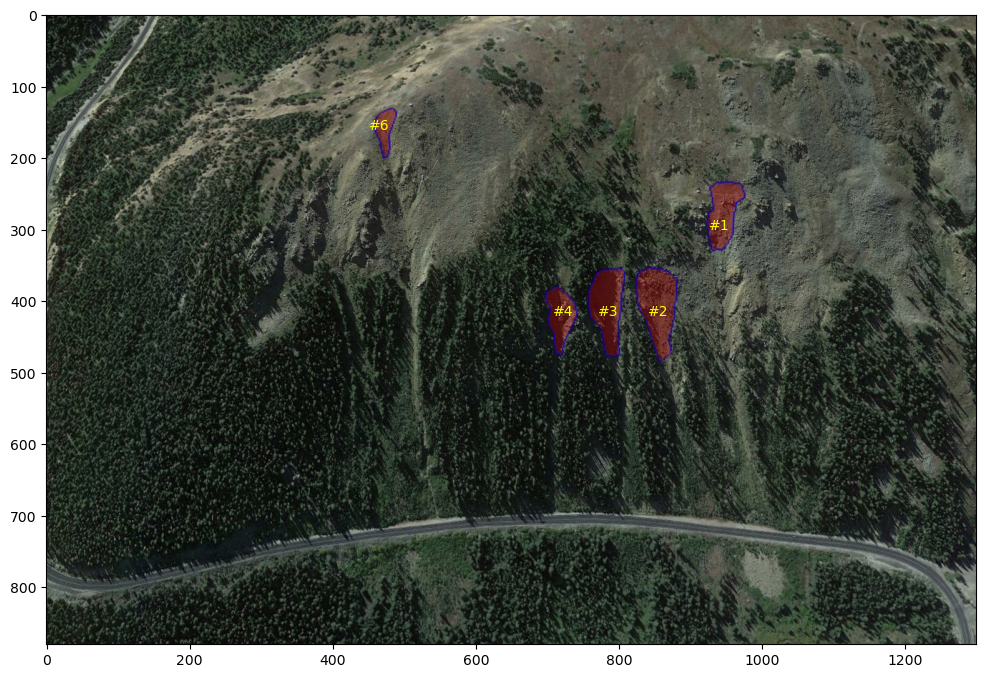

In [3]:
sisters_img = plt.imread(os.path.join(SISTERS_DATA_PATH, 'SatImg.jpg'))
plt.imshow(sisters_img[200:, 200:1500, :])
plt.text(925, 300, '#1', fontsize=10, c='yellow')
plt.text(840, 420, '#2', fontsize=10, c='yellow')
plt.text(770, 420, '#3', fontsize=10, c='yellow')
plt.text(707, 420, '#4', fontsize=10, c='yellow')
plt.text(450, 160, '#6', fontsize=10, c='yellow')

## Load Sisters DEM:

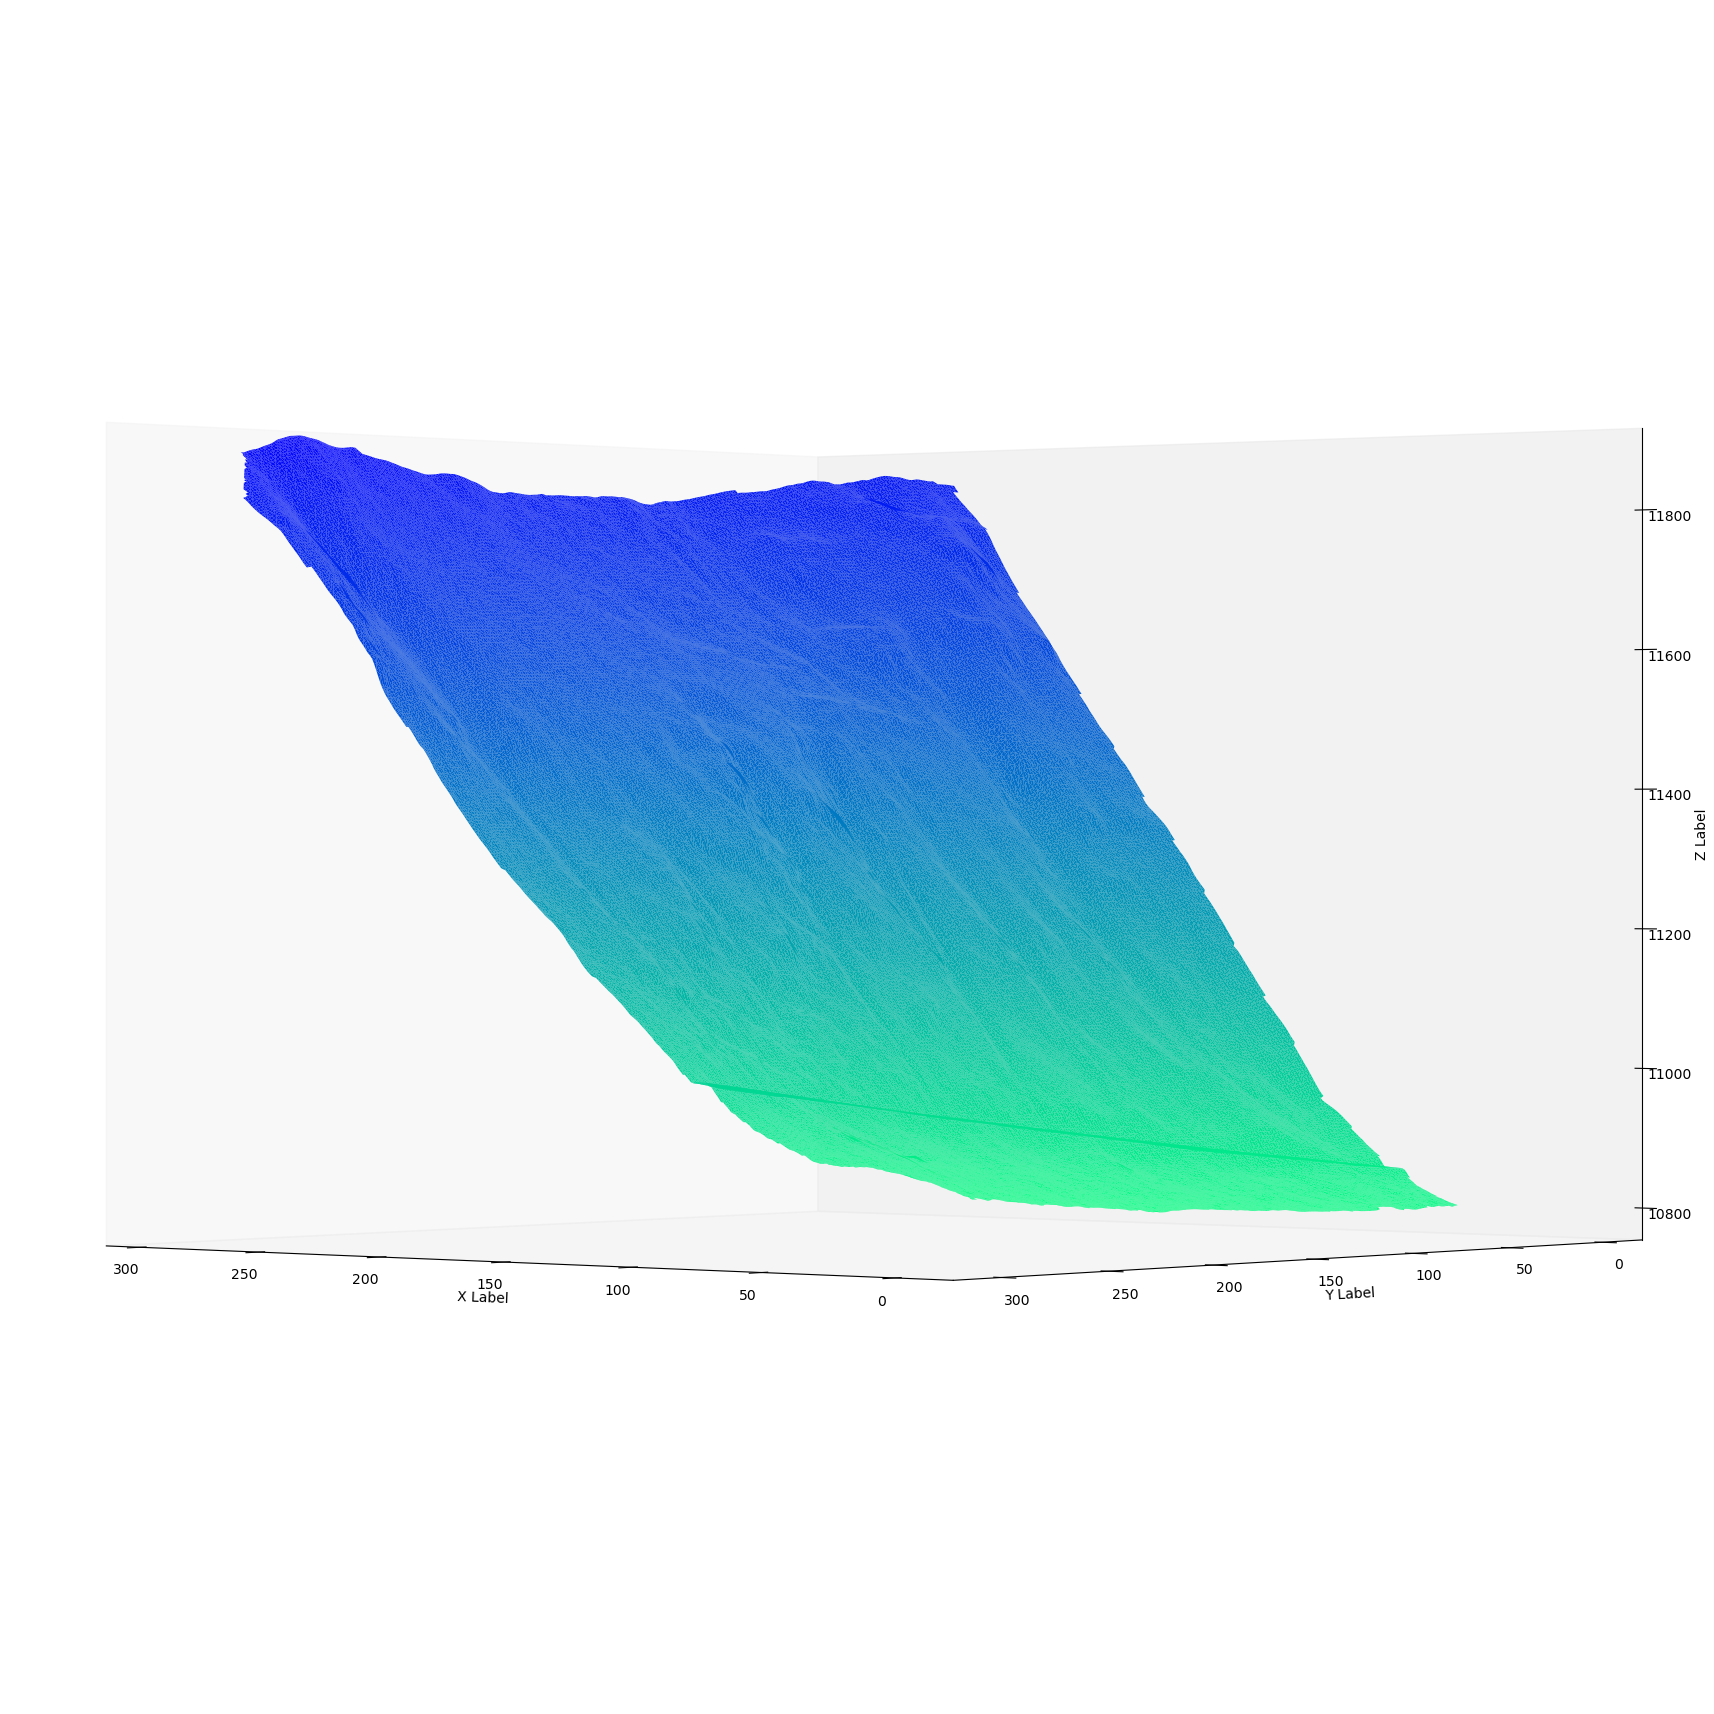

In [4]:
dem_path = os.path.join(SISTERS_DATA_PATH, 'Sisters_crp.tif')
dem = load_tif_as_Array(dem_path)
import cv2
_dem = cv2.pyrDown(dem) 
plot_3d(_dem, **{'view azi': 130, 'view elev': 0})

## Get train attributes:
### Slope:

Horn (1981) calculates the slope of a focal cell by using a central difference estimation of a surface fitted to the focal cell and its neighbors. The slope chosen is the maximum of this surface and can be returned in several formats. (Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918 [Link](doi:10.1109/PROC.1981.11918)
<rb>
### Aspect:
Horn (1981) calculates aspect as the direction of the maximum slope of the focal cell. The value returned is in Degrees. (Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918 [Link](doi:10.1109/PROC.1981.11918))

In [5]:
slope_attrs = get_slope_attributes(dem_path, 'slope_degrees', 'aspect')

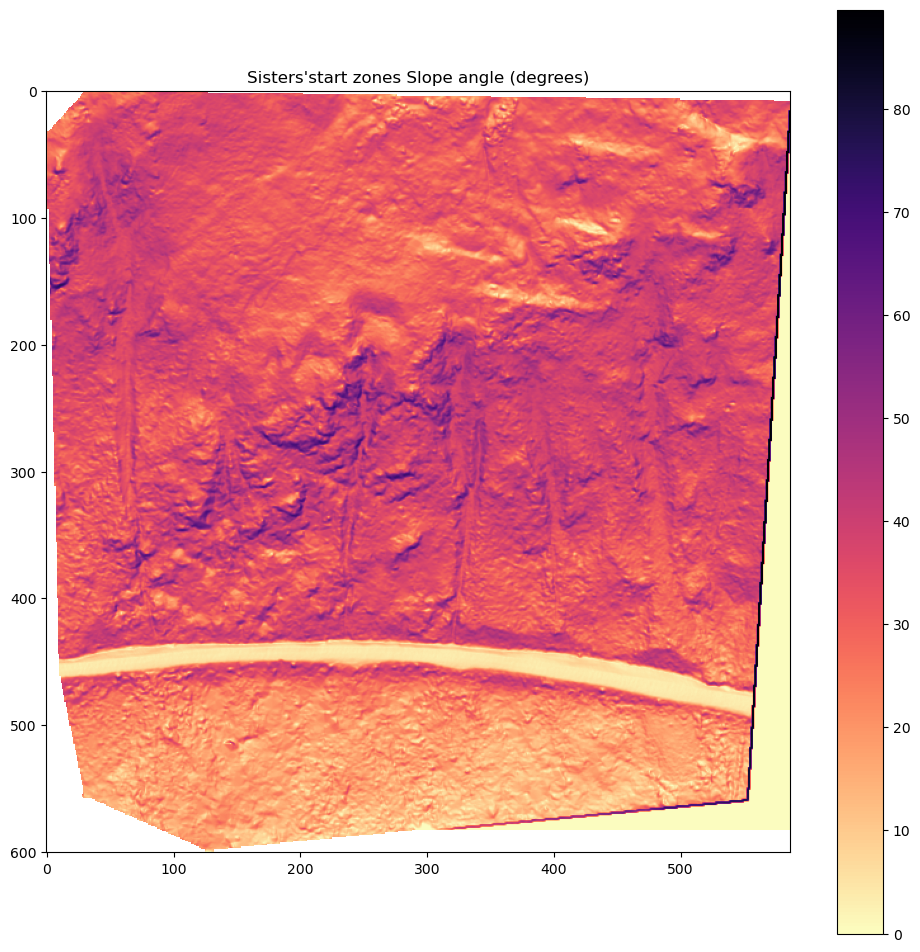

In [6]:
show_array(slope_attrs["Sisters_crp.ti slope_degrees"][::-1,::-1], cmap="magma_r", title="Sisters'start zones Slope angle (degrees)")

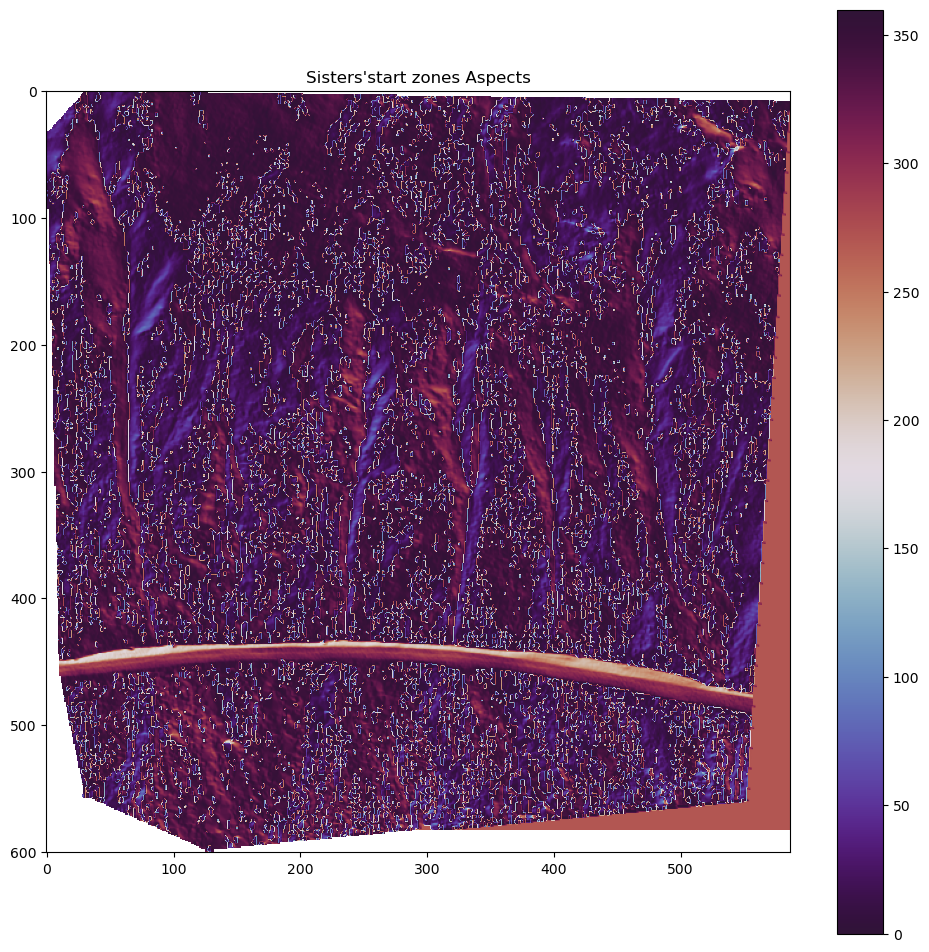

In [7]:
show_array(slope_attrs["Sisters_crp.ti aspect"][::-1,::-1], cmap="twilight_shifted", 
           title="Sisters'start zones Aspects")

### Crop the start zones like in the Google Earth image and
### show slope attributes for the start zones only

Text(2, 20, '#6')

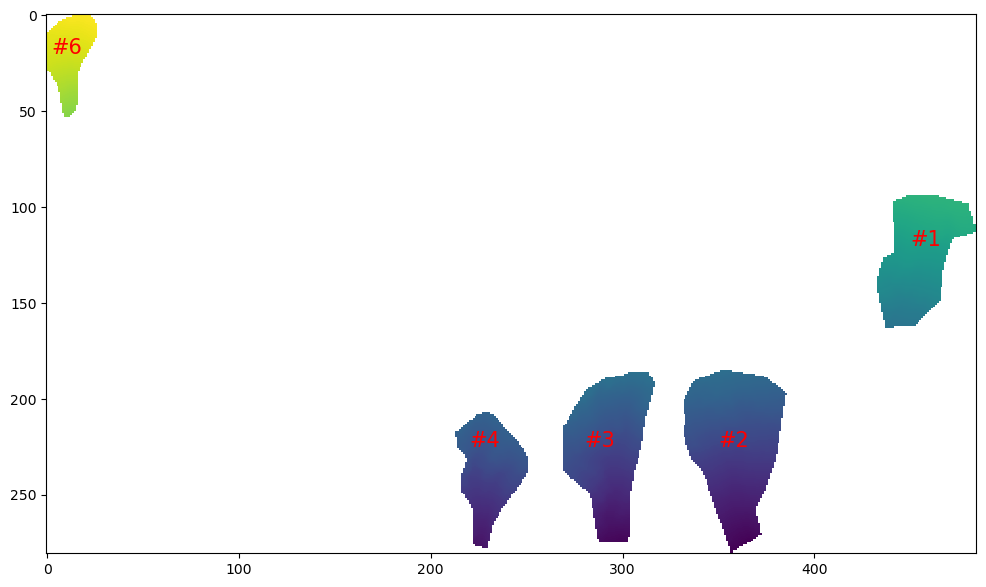

In [8]:
sisters_SZ_DEM_path = os.path.join(SISTERS_DATA_PATH, "Sisters_SZ_DEM.tif")
sisters_sz_polys_path = os.path.join(SISTERS_DATA_PATH, "Sisters_SZs.kml")
sisters_sz_dem = sisters_sz_dem = crop_tif(dem_path, sisters_SZ_DEM_path, sisters_sz_polys_path)
plt.imshow(sisters_sz_dem[::-1, ::-1])
plt.text(450,120, '#1', fontsize=15, c='red')
plt.text(350,225, '#2', fontsize=15, c='red')
plt.text(280,225, '#3', fontsize=15, c='red')
plt.text(220,225, '#4', fontsize=15, c='red')
plt.text(2,20, '#6', fontsize=15, c='red')

Text(2, 20, '#6')

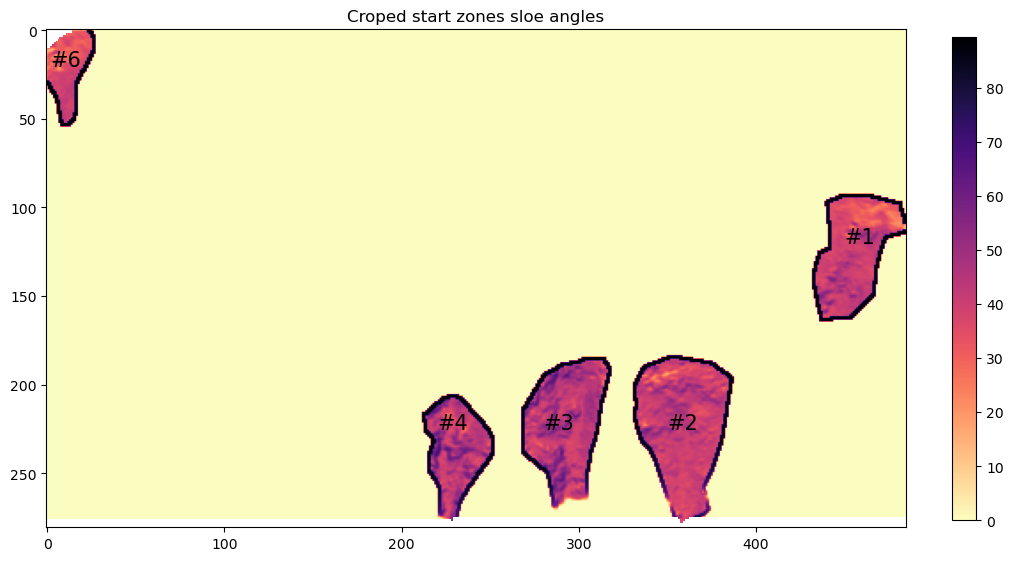

In [9]:
slope = get_slope_attributes(sisters_SZ_DEM_path, 'slope_degrees')
im = plt.imshow(slope['Sisters_SZ_DEM.ti slope_degrees'][::-1,::-1], cmap='magma_r')
plt.title("Croped start zones sloe angles")
plt.colorbar(im, fraction=0.026)
plt.text(450,120, '#1', fontsize=15, c='k')
plt.text(350,225, '#2', fontsize=15, c='k')
plt.text(280,225, '#3', fontsize=15, c='k')
plt.text(220,225, '#4', fontsize=15, c='k')
plt.text(2,20, '#6', fontsize=15, c='k')

### Generate slope parameters for each start zone comparison:

In [31]:
sisters_kml = glob(os.path.join(SISTERS_DATA_PATH, 'Sister ? SZ.kml'))
for kml in sisters_kml:
    out_path = kml.replace('.kml', '_DEM.tif')
    dem = crop_tif(dem_path, out_path, kml)

### Calculate the slope steepens for each 1.2 by 1.2 m cell for every start zone and plot the slope steepens probability distribution function:
Also calculate the slope angle kurtosis values (https://en.wikipedia.org/wiki/Kurtosis) as a poxy of how uniform/noneuniform the slope angle across the star zone. 

Fetching start zones data: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.75it/s]


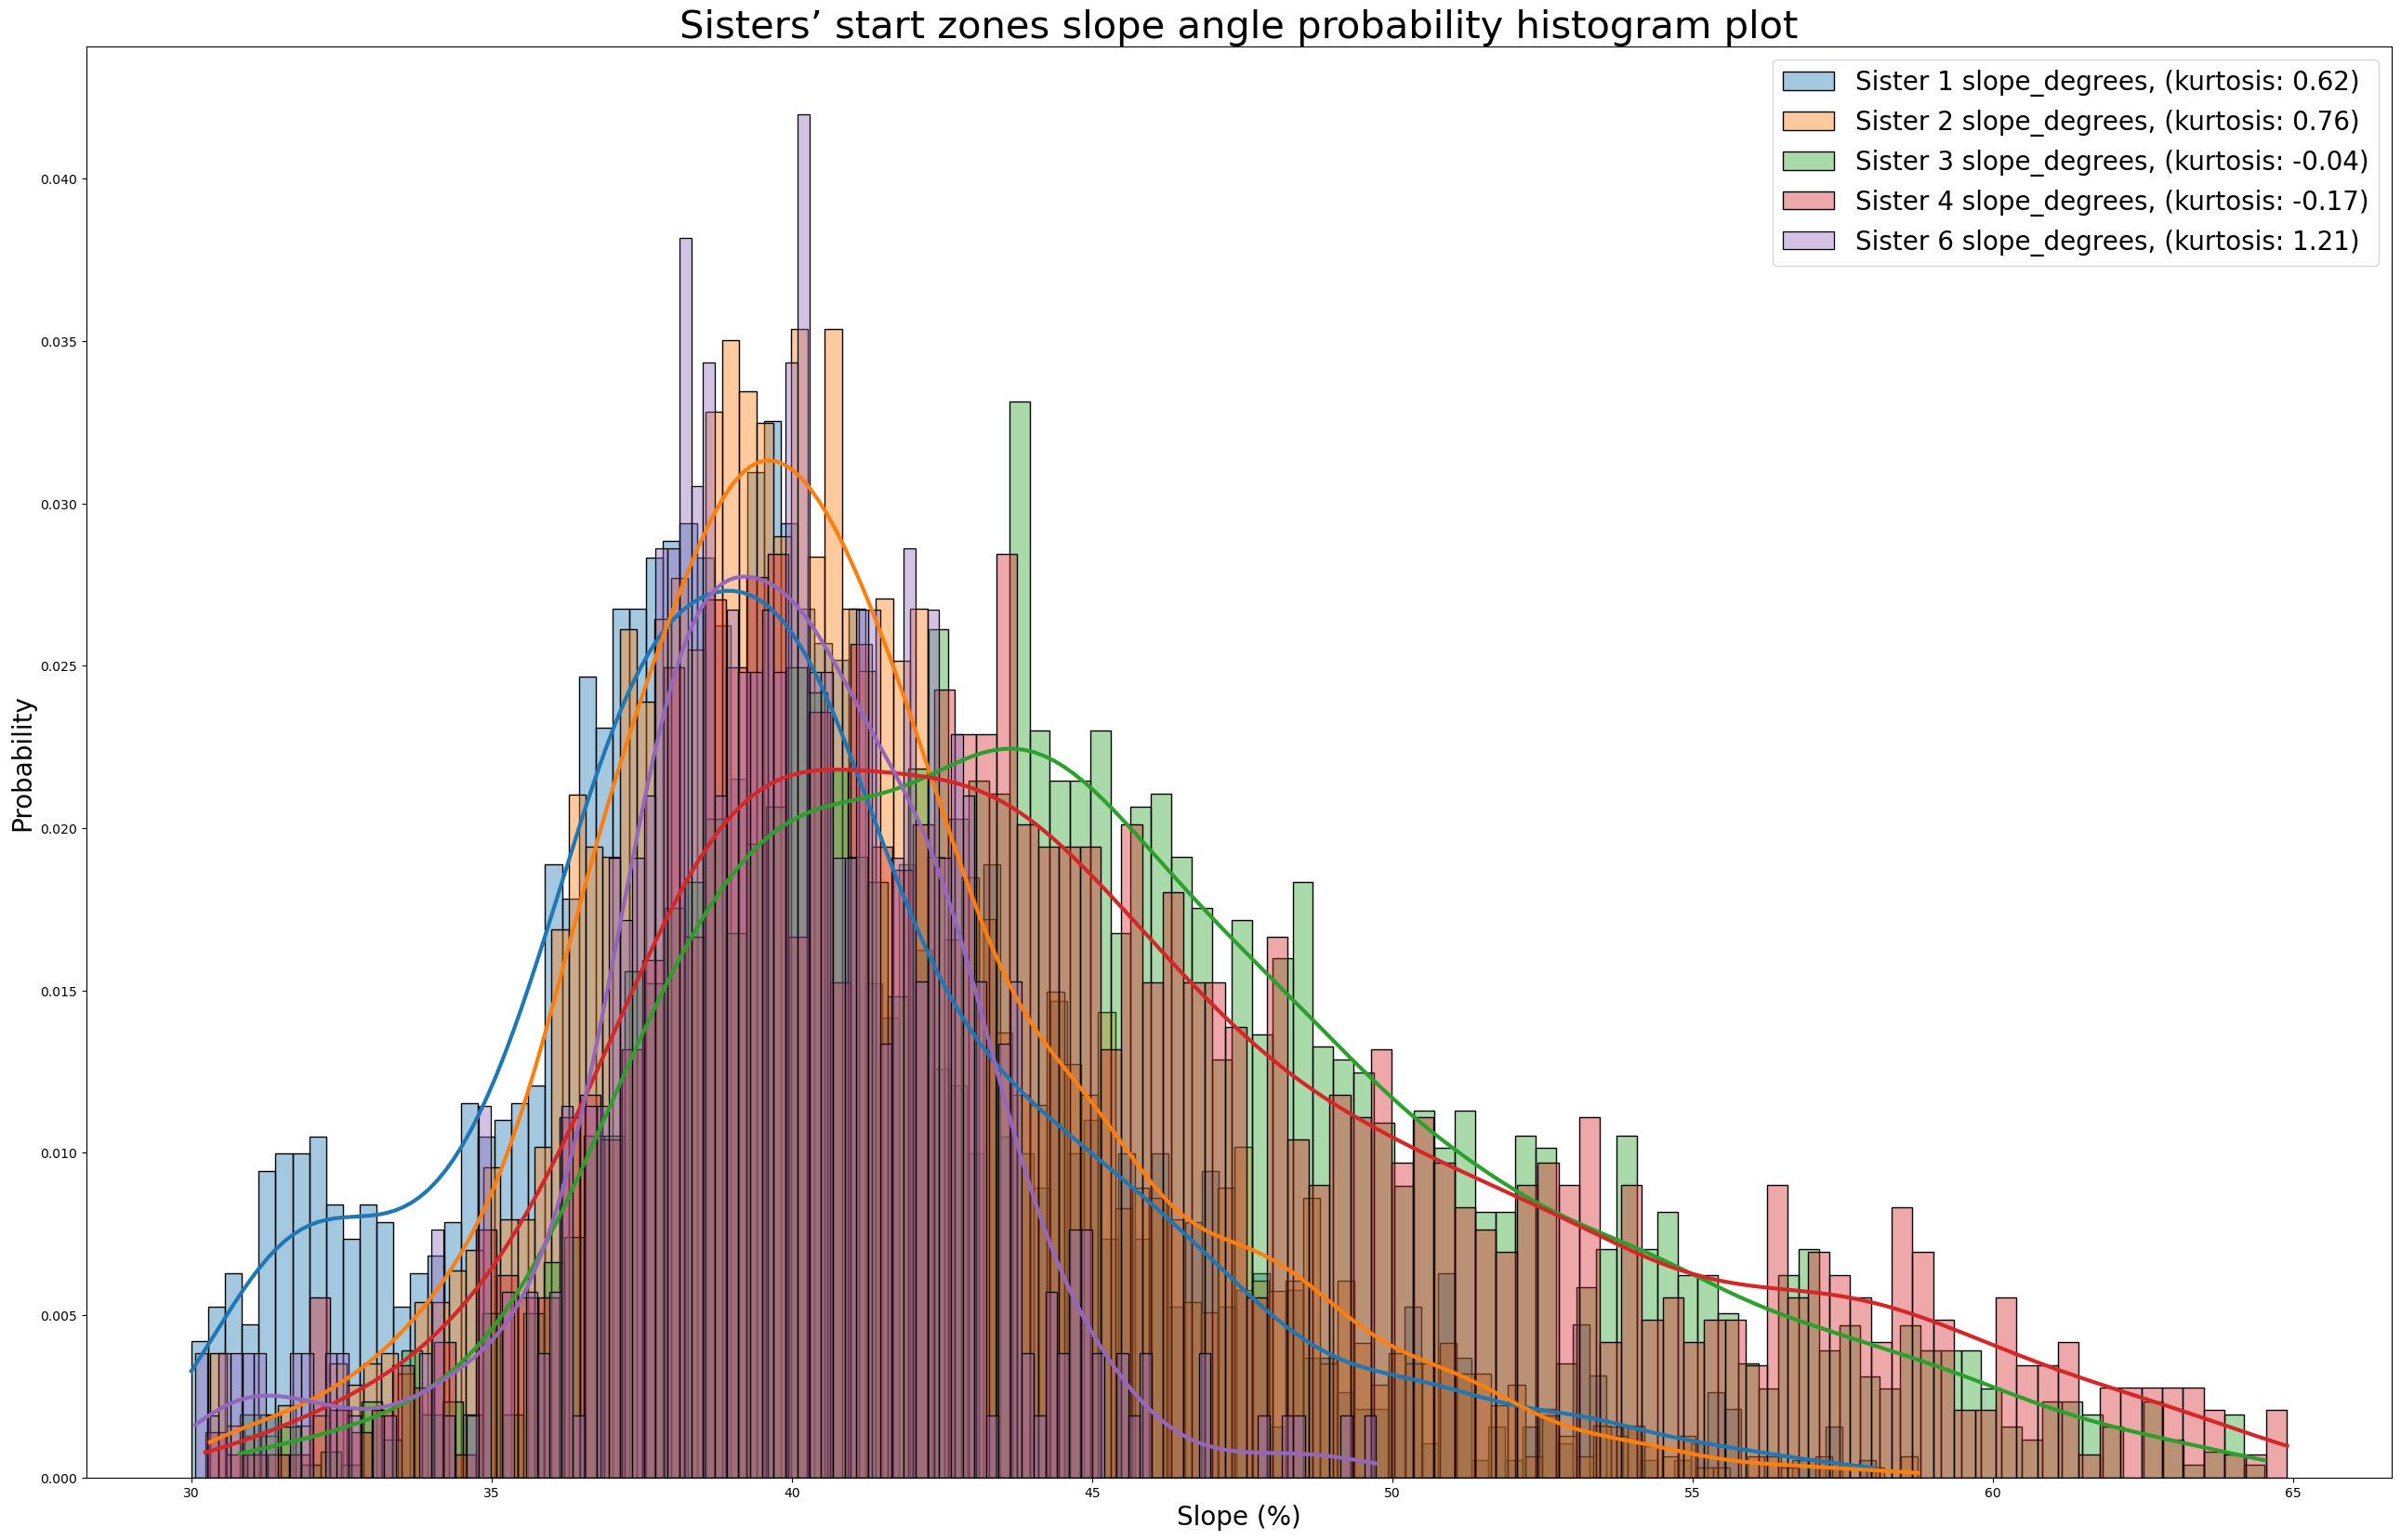

In [32]:
paths_data = []
for path in glob(os.path.join(SISTERS_DATA_PATH, 'Sister ? SZ_DEM.tif')):        
    sister_id = path[path.find(' '): path.rfind(' ')].strip()
    paths_data.append(get_slope_attributes(path, 'slope_degrees'))
    
paths_data = {k:v for pd in paths_data for k,v in pd.items()}

slope_kurtosis = plot_attr_vals_probability('slope_degrees', 
                                            title='Sisters’ start zones slope angle probability histogram plot', 
                                            **paths_data)

### Calculate the slope aspect for each 1.2 by 1.2 m cell for every start zone and plot the slope steepens probability distribution function:
Also calculate the slope angle kurtosis values (https://en.wikipedia.org/wiki/Kurtosis) as a poxy of how uniform/noneuniform are the different aspects across the star zone.

Fetching start zones data: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.32it/s]


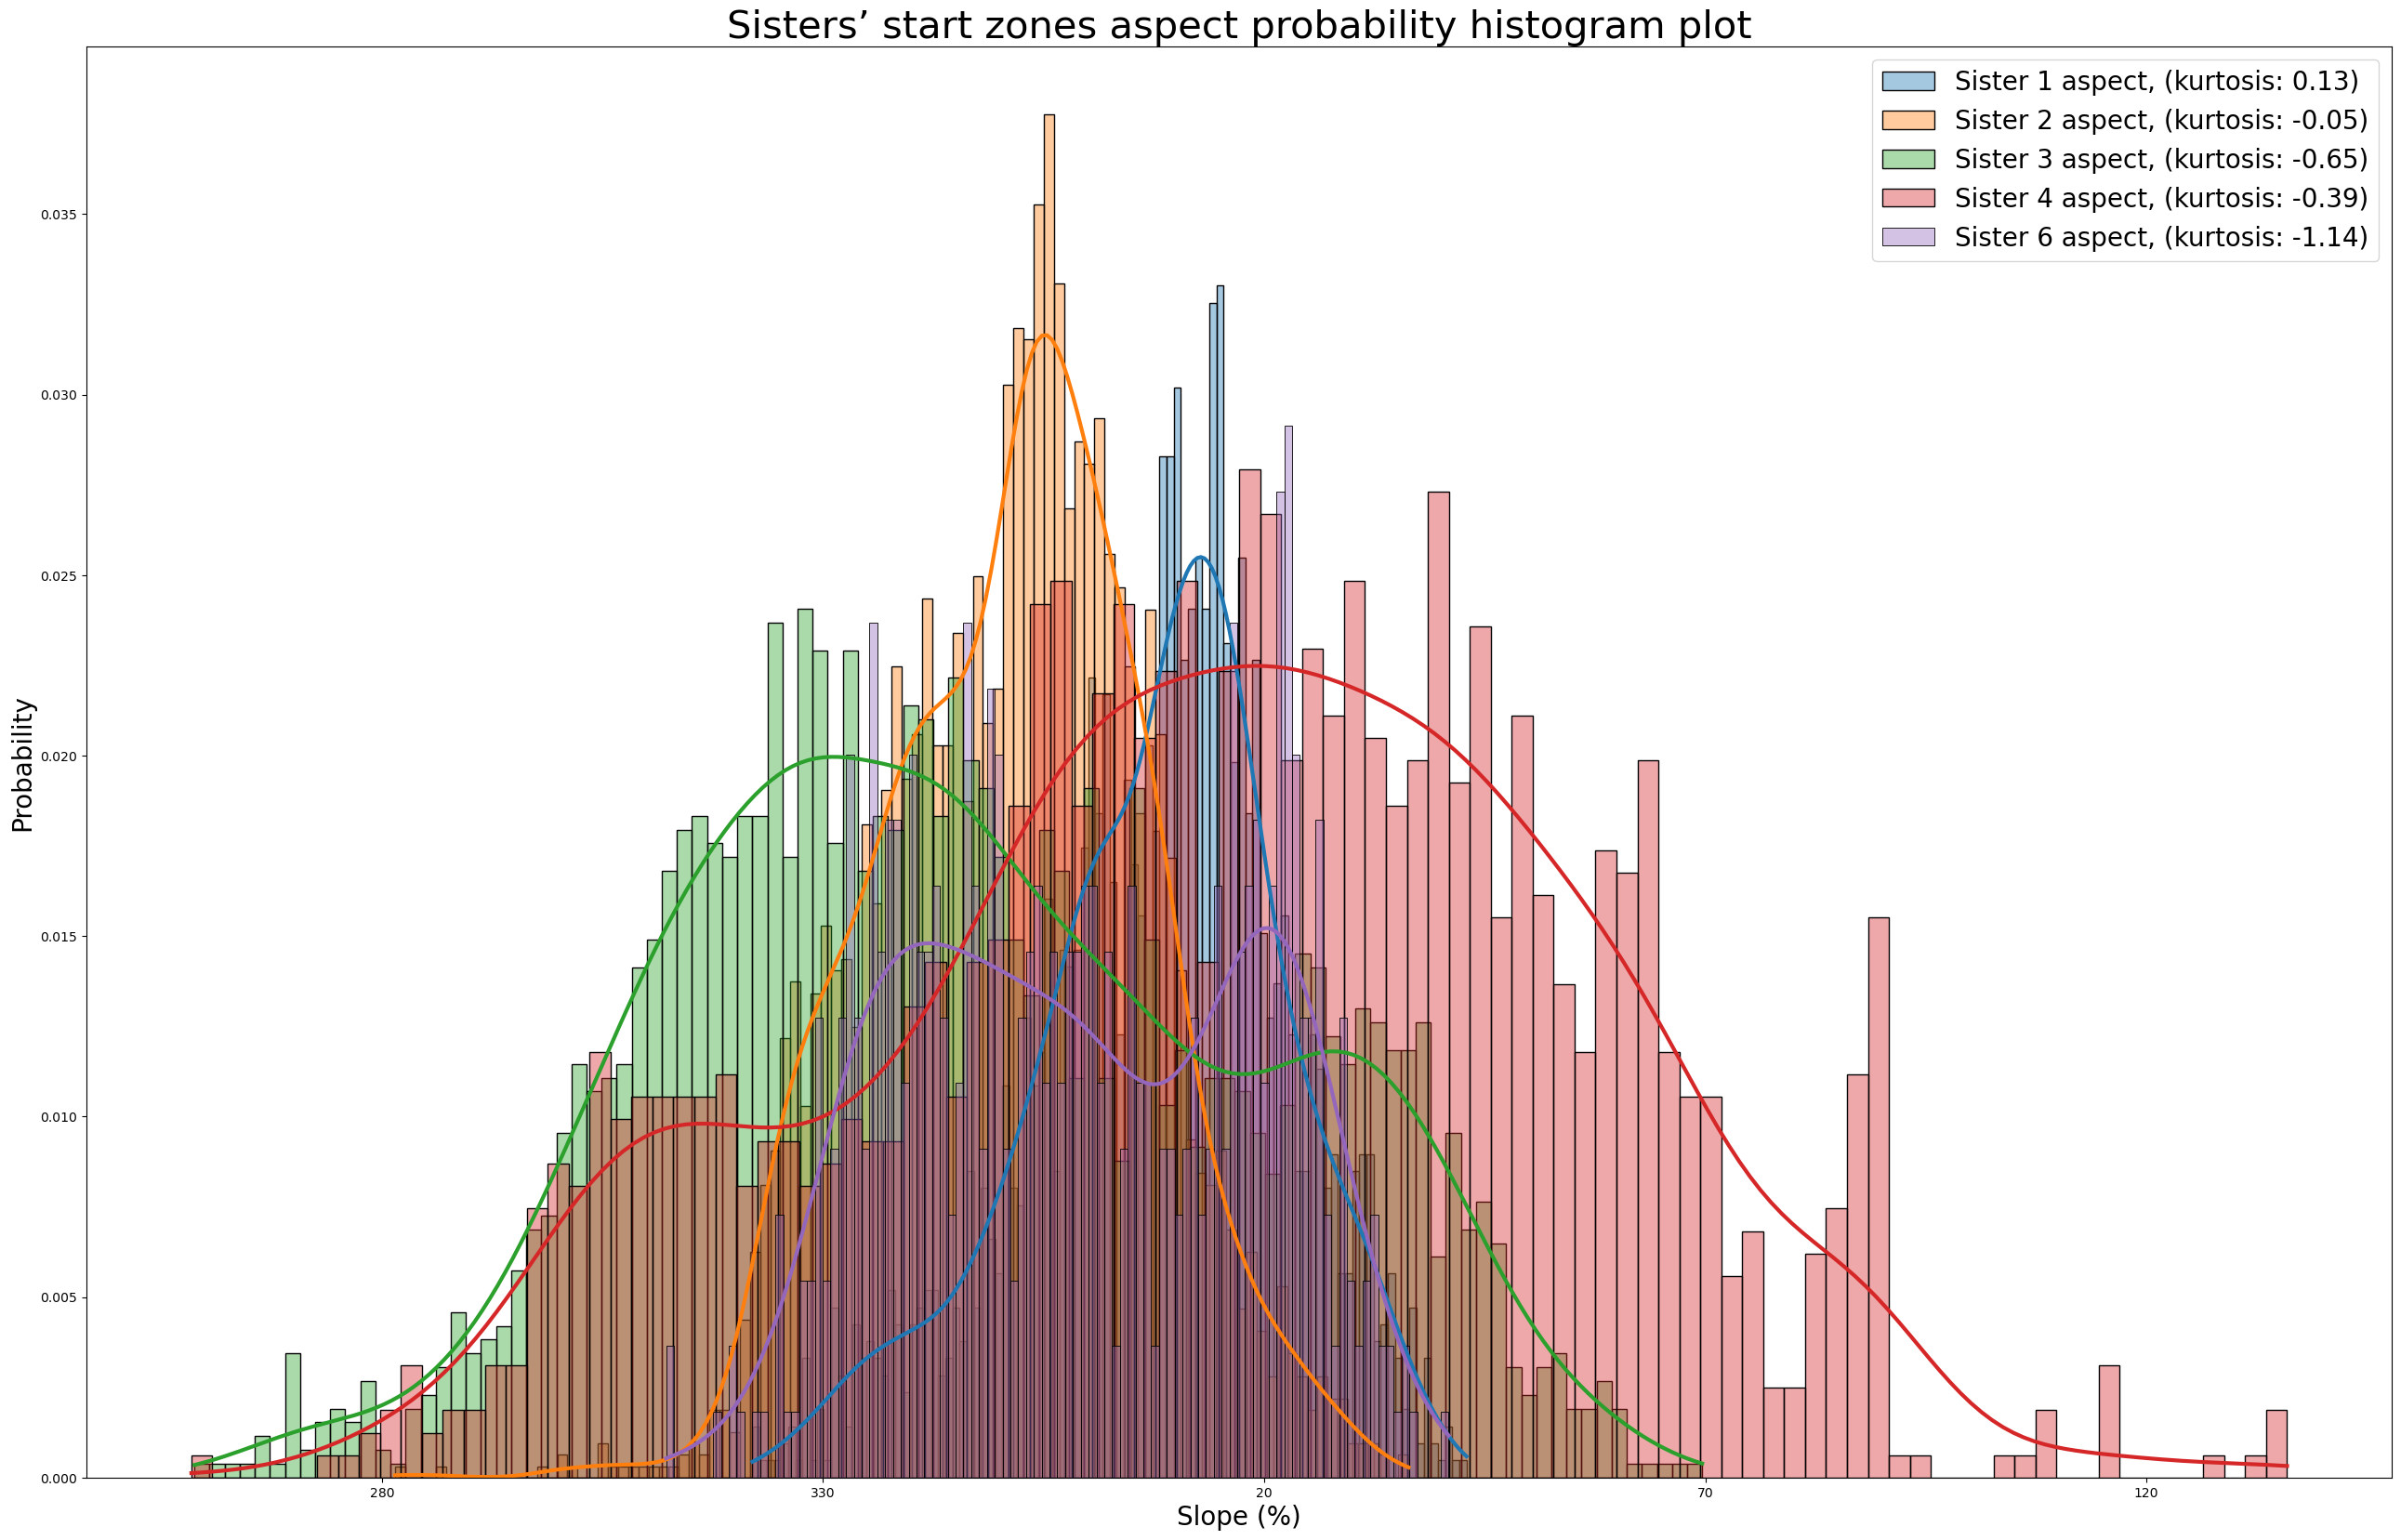

In [60]:
paths_data = []
for path in glob('../data/Sisters/Sister ? SZ_DEM.tif'):        
    sister_id = path[path.find(' '): path.rfind(' ')].strip()
    paths_data.append(get_slope_attributes(path, 'aspect'))
    
paths_data = {k:v for pd in paths_data for k,v in pd.items()}

aspect_kurtosis = plot_attr_vals_probability('aspect', title='Sisters’ start zones aspect probability histogram plot', **paths_data)

### Get natual HA/SS avalanche counts by start zone:

In [66]:
avalanche_data = load_avalanches(AVI_DATA_PATH, 'Sister', **{'type': ['HS', 'SS'], 'trig': ['N']})
avi_counts = avalanche_data.groupby('HW Path')['Type'].count()
print("All Natual avalanche counts")
print(avi_counts)
larger_avis = avalanche_data[avalanche_data['Dsize'] > 'D1']
lg_avi_counts = larger_avis.groupby('HW Path')['Type'].count()
print("> D1 Natual avalanche counts")
lg_avi_counts
total_avi_counts = pd.concat([avi_counts, lg_avi_counts],axis=1)
total_avi_counts.columns = ['All HS/SS avalanches', '>D1 HS/SS avalanches']
total_avi_counts

All Natual avalanche counts
HW Path
Seven Sister #1    5
Seven Sister #2    1
Seven Sister #3    5
Seven Sister #4    2
Seven Sister #6    1
Name: Type, dtype: int64
> D1 Natual avalanche counts


All HS/SS avalanches  >D1 HS/SS avalanches
HW Path                                                    
Seven Sister #1                     5                   NaN
Seven Sister #2                     1                   NaN
Seven Sister #3                     5                   5.0
Seven Sister #4                     2                   1.0
Seven Sister #6                     1                   1.0

### Plot the number of avalanches per start zone next to the start zones' slope and aspect kurtosis values

Text(0.5, 1.0, 'Sspect kurtosis values')

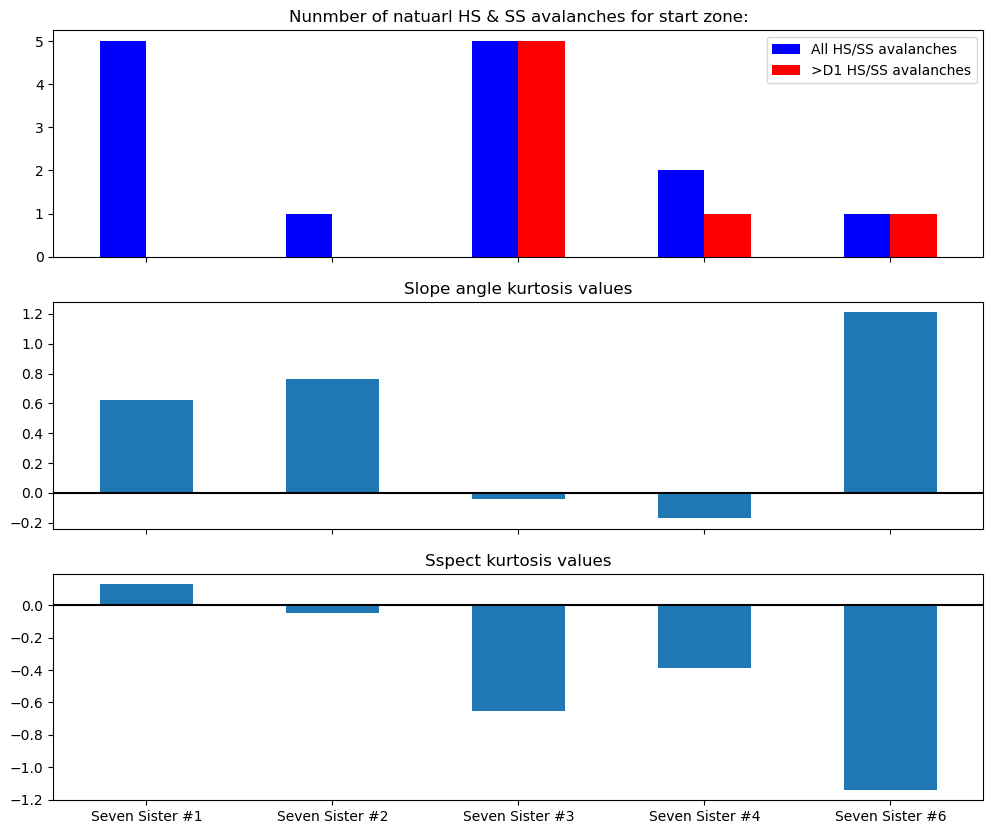

In [71]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(12,10))
x_axis = avi_counts.index
total_avi_counts.plot(kind='bar', ax=ax[0], color = ['b', 'r'])
ax[0].set_title('Nunmber of natuarl HS & SS avalanches for start zone:')
ax[1].bar(x_axis, slope_kurtosis.values(), width=0.5)
ax[1].axhline(y=0, xmin=0, xmax=1, c='k')
ax[1].set_title('Slope angle kurtosis values')
ax[2].bar(x_axis, aspect_kurtosis.values(), width=0.5)
ax[2].axhline(y=0, xmin=0, xmax=1, c='k')
ax[2].set_title('Sspect kurtosis values')